# Knock71: 評価対象の Model を用意しよう

In [2]:
# Data の読み込み
from sklearn.datasets import load_breast_cancer

load_data = load_breast_cancer()

import pandas as pd

df = pd.DataFrame(load_data.data, columns=load_data.feature_names)
df['y'] = load_data.target

In [3]:
# Data の分割
from sklearn.model_selection import train_test_split

X = df[['mean radius', 'mean texture']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(len(X_test))

171


In [4]:
# Random-Forest の構築および予測値の算出
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(max_depth=3, random_state=0).fit(X_train, y_train)

y_train_pred = rf_cls.predict(X_train)
y_test_pred = rf_cls.predict(X_test)

### Knock72: 正解率を算出しよう
#### 正解率
- １番 Orthodox な指標
- Sample の総数に対して何件予測を的中させたか示す

In [6]:
# 正解率の算出
from sklearn.metrics import accuracy_score

print(f"訓練 Data 正解率: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Data 正解率: {accuracy_score(y_test, y_test_pred)}")

訓練 Data 正解率: 0.9195979899497487
Test Data 正解率: 0.8888888888888888


正解率は、あまり過信してはいけない。
- Category 毎の予測精度までは見ることができない。
- Sample Data の偏りが大きい不均衡Data を扱っている場合は特に注意が必要。

### Knock73: 混同行列を見てみよう
#### 混同行列
**真陽性・偽陽性・真陰性・偽陰性** のそれぞれの Sample件数を Matrix表で可視化する。
個別の Category ごとの予測精度を俯瞰して見ることができ、どの部分での予測が弱いのか等も含め、直感的に把握できる。
多値分類でも使用することができ、Category数が多くなればなるほど、視覚に訴える混同行列の Merit を享受できる。
> - 真陽性（TP: True Positive）･･･ 実際に陽性で正しく陽性と予測された Sample
> - 偽陽性（FP: False Positive）･･･ 実際には陽性だが陰性と予測された Sample
> - 真陰性（TN: True Negative）･･･ 実際に陰性で正しく陰性と予測された Sample
> - 偽陰性（FP: False Negative）･･･ 実際には陰性だが陽性と予測された Sample

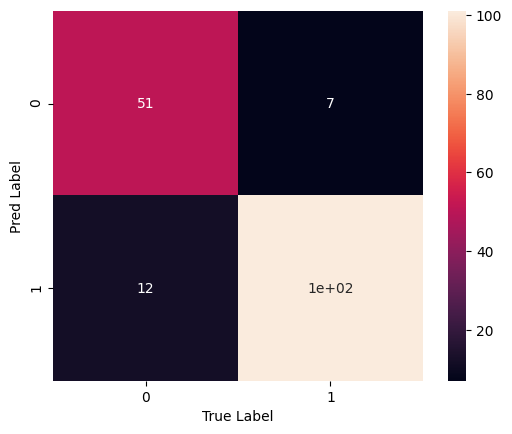

In [7]:
# 混同行列の可視化
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(matrix.T, square=True, annot=True)
plt.xlabel('True Label')
plt.ylabel('Pred Label')
plt.show()

**混同行列**
Model の精度の概観を把握するのには役立つが、Model の改善や、Model の構築目的に合った評価を行なうには、混同行列で算出した結果を別の方法で解釈する必要性がある。

### Knock74: 適合率を算出しよう
#### 適合率
Model が「どれだけ正確に予測できているか」を示す指標。

*適合率 = 正しく陽性と予測できた Sample数 / 陽性と予測した Sample数 = TP / TP + FP*

数式の分母より、偽陽性件数を減らすことが適合率の向上につながることを意味する。

In [9]:
# 適合率の算出
from sklearn.metrics import precision_score

print(f"訓練 Data 適合率: {precision_score(y_train, y_train_pred, pos_label=0)}")
print(f"Test Data 適合率: {precision_score(y_test, y_test_pred, pos_label=0)}")
# pos_label= : 陽性Label を指定する引数

訓練 Data 適合率: 0.9534883720930233
Test Data 適合率: 0.8793103448275862


適合率を用いた Model の評価は、**再現率**を併用して行なわれる。

### Knock75: 再現率を算出しよう
#### 再現率
Model が「どれだけ網羅的に予測できているか」を示す指標。

*再現率 = 正しく陽性と予測できた Sample数 / 実際に陽性である Sample数 = TP / TP + FN*

数式の分母から、偽陽性の件数は考慮されていないことが分かる。
多少、偽陽性が増えても多くの真陽性を検出したい、ということであれば再現率を重視した方が良い。
再現率と適合率は trade-off の関係になる。

In [10]:
# 再現率の算出
from sklearn.metrics import recall_score

print(f"訓練 Data 再現率: {recall_score(y_train, y_train_pred, pos_label=0)}")
print(f"Test Data 再現率: {recall_score(y_test, y_test_pred, pos_label=0)}")

訓練 Data 再現率: 0.825503355704698
Test Data 再現率: 0.8095238095238095


適合率と再現率はそれぞれ異なった特徴を持っているため、それぞれの指標を個別に見ても、Model としての精度の全体像が見えにくい。この問題を解消するために使用されるのが **F1値**。

### Knock76: F1値を算出しよう
#### F1値
適合率と再現率の双方の Balance を考慮した指標。適合率と再現率の調和平均をとったもの。

*F1値 = 2 * (適合率 * 再現率 / (適合率 + 再現率))*

In [11]:
# F1値の算出
from sklearn.metrics import f1_score

print(f"訓練 Data F1値: {f1_score(y_train, y_train_pred, pos_label=0)}")
print(f"Test Data F1値: {f1_score(y_test, y_test_pred, pos_label=0)}")

訓練 Data F1値: 0.8848920863309353
Test Data F1値: 0.8429752066115702


F1値は、その特徴から、分類Model の総合的な評価指標として使用されることが多い。
実際の運用で使える Model かどうか測るためには F1値だけでなく、適合率や再現率などの個別の指標にも目を向ける必要がある。